# Notebook (Capitulo 6) Dr. Armando 

### 1. Importar

In [1]:
%%time
import os

print(os.getcwd())

C:\Users\IIEc\Documents\Anaconda Scripts\Stata_armando
CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
%%time
import pandas as pd 

path_in = "C:\\Users\\IIEc\\Documents\\Anaconda Scripts\\Stata_armando\\input\\"
path_out = "C:\\Users\\IIEc\\Documents\\Anaconda Scripts\\Stata_armando\\output\\"

df = pd.read_stata(path_in + "f_ingreso.dta")

CPU times: total: 15.6 ms
Wall time: 11.8 ms


### 2. Mostrar informacion del archivo 

In [3]:
%%time

df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,entidad,edad,raba,edu,hextra_edu,w,sexo,li,ecivil,dh,reprobacion,trend
0,Guerrero,19.0,NaN,NaN,ninguno,350.0,Mujer,1.0,0.0,1.0,0.0,2.0
1,Guerrero,17.0,decidiÓ empezar a trabajar,NaN,NaN,650.0,Mujer,1.0,1.0,1.0,0.0,14.0
2,Guerrero,19.0,NaN,NaN,NaN,250.0,Hombre,1.0,1.0,1.0,0.0,41.0
3,Guerrero,15.0,NaN,NaN,NaN,250.0,Mujer,1.0,1.0,1.0,0.0,46.0
4,Guerrero,21.0,decidiÓ empezar a trabajar,NaN,NaN,1500.0,Hombre,1.0,0.0,1.0,0.0,53.0


In [4]:
%%time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12048 entries, 0 to 12047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   entidad      12048 non-null  category
 1   edad         12048 non-null  category
 2   raba         10969 non-null  category
 3   edu          777 non-null    category
 4   hextra_edu   743 non-null    category
 5   w            12048 non-null  category
 6   sexo         12048 non-null  category
 7   li           12048 non-null  float32 
 8   ecivil       12048 non-null  float32 
 9   dh           12048 non-null  float32 
 10  reprobacion  11966 non-null  float32 
 11  trend        12048 non-null  float32 
dtypes: category(7), float32(5)
memory usage: 342.9 KB
CPU times: total: 15.6 ms
Wall time: 5.75 ms


In [5]:
%%time

df.describe()

CPU times: total: 0 ns
Wall time: 8.1 ms


,li,ecivil,dh,reprobacion,trend
count,12048.000000,12048.000000,12048.000000,11966.000000,12048.000000
mean,0.214807,0.751162,0.060591,0.187364,33288.265625
std,0.410712,0.432355,0.238584,0.390242,19077.644531
min,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,1.000000,0.000000,0.000000,17702.500000
50%,0.000000,1.000000,0.000000,0.000000,32416.500000
75%,0.000000,1.000000,0.000000,0.000000,48798.250000
max,1.000000,1.000000,1.000000,1.000000,70155.000000


### 3. Tabulando para el sexo 

In [6]:
%%time

df_tab = df["sexo"].value_counts().reset_index()
df_tab['percent'] = df_tab['count'] / (df_tab['count'].sum()) * 100
df_tab['cumulative'] = df_tab['percent'].cumsum()

df_tab.head()

CPU times: total: 0 ns
Wall time: 2.04 ms


,sexo,count,percent,cumulative
0,Hombre,8793,72.983068,72.983068
1,Mujer,3255,27.016932,100.000000


### 4. Generando una columna o variable que indique el numero de observaciones 

In [7]:
%%time

df['i'] = range(1, len(df) + 1)

CPU times: total: 0 ns
Wall time: 421 μs


### 5. Generando algunas graficas previas 

##### 5.1 Distribucion de los salarios de los empleados 

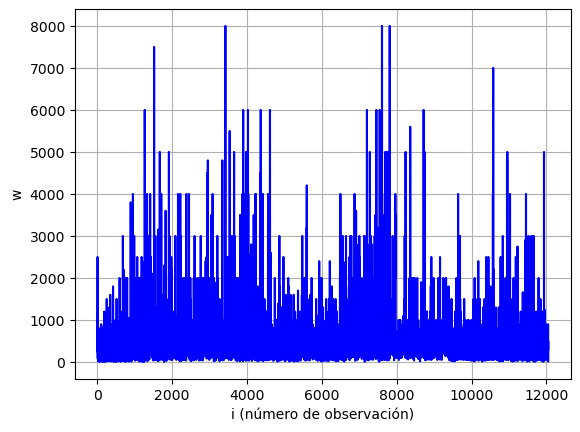

CPU times: total: 500 ms
Wall time: 494 ms


In [8]:
%%time
import matplotlib.pyplot as plt


plt.plot(df['i'], df['w'], linestyle='-', marker='', color='blue')
plt.xlabel('i (número de observación)')
plt.ylabel('w')
plt.grid(True)
plt.show()

##### 3.2 Distribucion de los salarios de los individuos 

CPU times: total: 31.2 ms
Wall time: 32.5 ms


<Axes: >

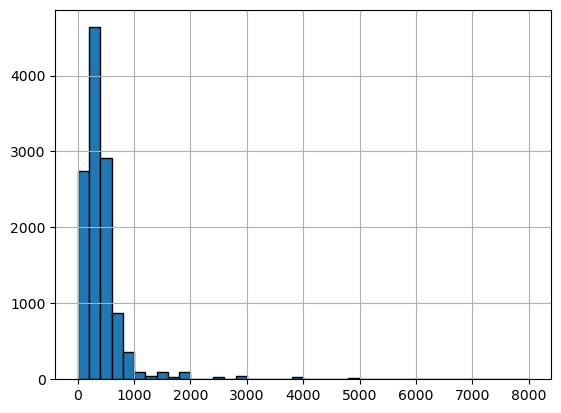

In [9]:
%%time
import matplotlib.pyplot as plt

df['w'].hist(bins = 40, edgecolor = "black")

##### 3.3 Densidad de la distrinbucion de los salarios 

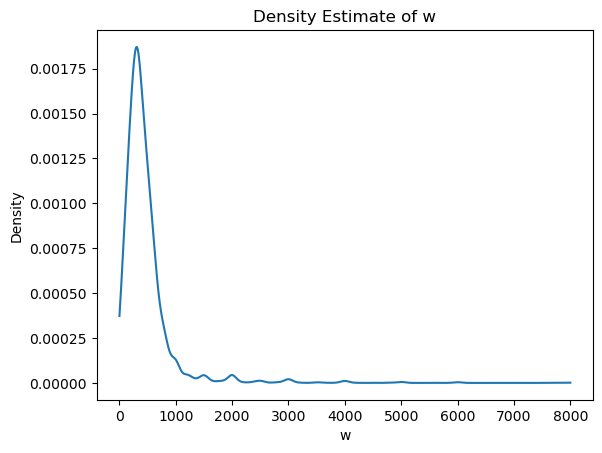

In [10]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

data = df['w']
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 1000)
plt.plot(x_range, kde(x_range))
plt.title('Density Estimate of w')
plt.xlabel('w')
plt.ylabel('Density')
plt.show()

### 6. Distribucion por percentiles de los salarios 

In [11]:
%%time
import scipy.stats as stats

# tipo de datos 
df['w'] = df['w'].astype(float)

print("Variance: ", df['w'].var())
print("Skewness: ", stats.skew(df['w']))
print("Kurtosis: ", stats.kurtosis(df['w'], fisher=False))
print(df['w'].describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

Variance:  244346.0998311082
Skewness:  5.824668452317433
Kurtosis:  54.82044265396446
count    12048.000000
mean       459.666335
std        494.313767
min          2.000000
1%          30.000000
5%          80.000000
10%        149.400000
25%        240.000000
50%        360.000000
75%        500.000000
90%        800.000000
95%       1000.000000
99%       2801.590000
max       8000.000000
Name: w, dtype: float64
CPU times: total: 0 ns
Wall time: 4.07 ms


### 7. Datos estadisticos 

In [12]:
%%time

df['w'].describe()

CPU times: total: 0 ns
Wall time: 1.6 ms


count    12048.000000
mean       459.666335
std        494.313767
min          2.000000
25%        240.000000
50%        360.000000
75%        500.000000
max       8000.000000
Name: w, dtype: float64

### 8. Graficando variables

#### 8.1 Grafica de la media de los ingresos por entidad 

CPU times: total: 156 ms
Wall time: 148 ms


<Axes: xlabel='w', ylabel='entidad'>

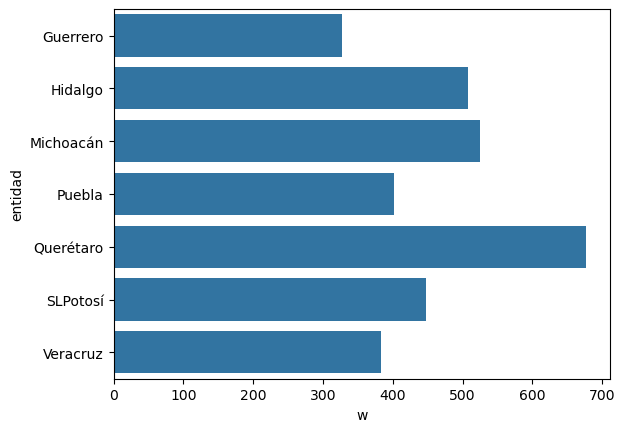

In [13]:
%%time
import seaborn as sns 

mean_by_entidad = df.groupby('entidad', observed=False)['w'].mean().sort_values()
sns.barplot(x = mean_by_entidad, y = mean_by_entidad.index, orient = "h")

#### 8.2 Diagrama de dispersion 

##### 8.2.1 Salarios por edad 

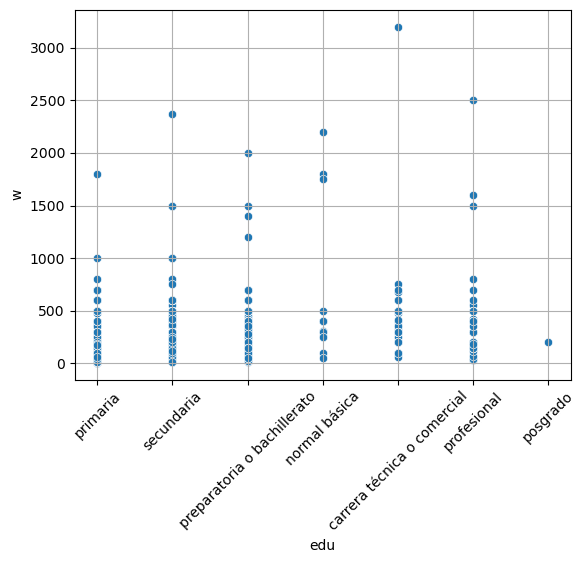

CPU times: total: 93.8 ms
Wall time: 102 ms


In [14]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='edu', y='w')  
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

##### 8.2.2. Educacion con una linea en las medias 

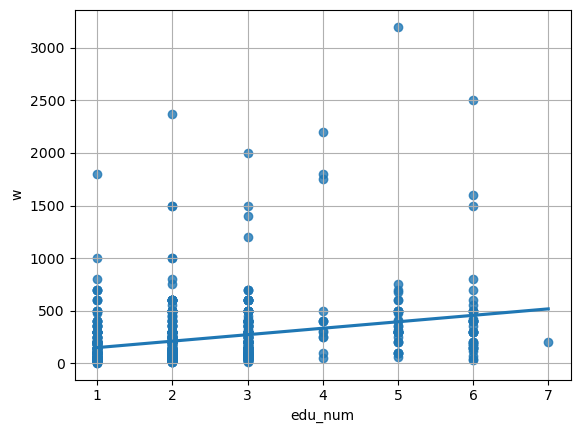

CPU times: total: 766 ms
Wall time: 98.7 ms


In [15]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

edu_order = {
    'primaria': 1,
    'secundaria': 2,
    'preparatoria o bachillerato': 3,
    'normal básica': 4,
    'carrera técnica o comercial': 5,
    'profesional': 6,
    'posgrado': 7
}

# Crear una nueva columna numérica
df['edu_num'] = df['edu'].map(edu_order)

sns.regplot(data=df, x='edu_num', y='w', scatter=True, ci=None)
plt.ylabel('w')
plt.grid(True)
plt.show()

### 9. Estadisticas de salarios condicionadas por el nivel de educacion 

In [16]:
%%time

df[df['edu'] == "preparatoria o bachillerato"]['w'].describe()

CPU times: total: 0 ns
Wall time: 3.74 ms


count     209.000000
mean      240.459330
std       244.691544
min        12.000000
25%       100.000000
50%       160.000000
75%       300.000000
max      2000.000000
Name: w, dtype: float64

In [17]:
%%time

df[df['edu'] == "carrera técnica o comercial"]['w'].describe()

CPU times: total: 0 ns
Wall time: 2 ms


count      35.000000
mean      438.428571
std       512.561003
min        60.000000
25%       275.000000
50%       300.000000
75%       500.000000
max      3200.000000
Name: w, dtype: float64

### 10. Pruebas de correlacion 

#### 10.1 Pearson

Educacion y salarios

In [18]:
%%time

# diciponario para las categorias 
edu_numeric = {
    "preescolar o kinder": 1,
    "primaria": 2,
    "secundaria": 3,
    "preparatoria o bachillerato": 4,
    "normal básica": 5,
    "carrera técnica o comercial": 6,
    "profesional": 7,
    "posgrado": 8,
    "no sabe nivel": 9
}
df['edu_num'] = df['edu'].map(edu_numeric)

corr = df[['w', 'edu_num']].corr(method='pearson')
print(corr)

                w   edu_num
w        1.000000  0.268727
edu_num  0.268727  1.000000
CPU times: total: 0 ns
Wall time: 2.04 ms


#### 10.2 Spearman

Educacion y salarios

In [19]:
%%time
from scipy.stats import spearmanr

# Quitar valores null 
filtered_df = df[['w', 'edu_num']].dropna()

# Correlacion de Spearman 
corr, p_value = spearmanr(filtered_df['w'], filtered_df['edu_num'])

print("Numer of obs: ", len(filtered_df))
print(f"Spearman rho: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Numer of obs:  777
Spearman rho: 0.3277
P-value: 0.0000
CPU times: total: 0 ns
Wall time: 3.06 ms


#### 10.3 Spearman

Edad y salarios

In [20]:
%%time
from scipy.stats import spearmanr

df['w'] = pd.to_numeric(df['w'], errors='coerce')
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# Correlacion de Spearman
corr, p_value = spearmanr(df['w'], df['edad'], nan_policy='omit')

print("Numer of obs: ", len(df))
print(f"Spearman rho: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Numer of obs:  12048
Spearman rho: 0.1970
P-value: 0.0000
CPU times: total: 15.6 ms
Wall time: 12.1 ms


### 11. Regresiones para MCO 

In [21]:
%%time
import statsmodels.api as sm
    
df_reg = df[['w', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy() # Filtrar las columnas a utilizar 
    
# Remplazar Strings con codigos numericos
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg['hextra_edu_num'] = df_reg['hextra_edu'].replace(hextra_map)
    
df_reg['hextra_edu_num'] = pd.to_numeric(df_reg['hextra_edu_num'], errors='coerce') # Convertir a valores numericos, el parsing invalido lo pasa a NaN
df_reg = df_reg.dropna().reset_index(drop=True) # Quitar valores NaN
    
X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
y = df_reg['w']
X = sm.add_constant(X)  # añade el termino del intercepto 
model = sm.OLS(y, X).fit()
    
root_mse = np.sqrt(model.mse_resid)
    
print("Root MSE:", round(root_mse, 2))
print(model.summary())

Root MSE: 273.71
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     31.41
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           3.84e-24
Time:                        15:40:44   Log-Likelihood:                -5109.0
No. Observations:                 727   AIC:                         1.023e+04
Df Residuals:                     722   BIC:                         1.025e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            418.5868  

<timed exec>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<timed exec>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


#### 11.1 Tabulando algunas de las variables que componene la regresion para su interpretacion 

##### Estaid Civil

In [22]:
%%time

df_tab_ecivil = df["ecivil"].value_counts().sort_values().reset_index()
df_tab_ecivil['percent'] = df_tab_ecivil['count'] / (df_tab_ecivil['count'].sum()) * 100
df_tab_ecivil['cumulative'] = df_tab_ecivil['percent'].cumsum()

df_tab_ecivil.head()

CPU times: total: 0 ns
Wall time: 1.59 ms


,ecivil,count,percent,cumulative
0,0.0,2998,24.883798,24.883798
1,1.0,9050,75.116202,100.000000


##### Educacion 

In [23]:
%%time

df_tab_edu = df["edu"].value_counts().reset_index()

custom_order = [
    'primaria',
    'secundaria',
    'preparatoria o bachillerato',
    'normal básica',
    'carrera técnica o comercial',
    'profesional',
    'posgrado'
]

# Filtrado 
df_tab_edu = df_tab_edu[df_tab_edu['edu'].isin(custom_order)]
df_tab_edu = df_tab_edu.set_index('edu').loc[custom_order].reset_index()

total = df_tab_edu['count'].sum()
df_tab_edu['percent'] = (df_tab_edu['count'] / total * 100).round(2)
df_tab_edu['cum_percent'] = df_tab_edu['percent'].cumsum().round(2)

df_tab_edu.head(10)

CPU times: total: 15.6 ms
Wall time: 3.07 ms


,edu,count,percent,cum_percent
0,primaria,198,25.48,25.48
1,secundaria,282,36.29,61.77
2,preparatoria o bachillerato,209,26.90,88.67
3,normal básica,13,1.67,90.34
4,carrera técnica o comercial,35,4.50,94.84
5,profesional,39,5.02,99.86
6,posgrado,1,0.13,99.99


##### Derechohabiente

In [24]:
%%time

df_tab_dh = df["dh"].value_counts().reset_index()
df_tab_dh['percent'] = df_tab_dh['count'] / (df_tab_ecivil['count'].sum()) * 100
df_tab_dh['cumulative'] = df_tab_dh['percent'].cumsum()

df_tab_dh.head()

CPU times: total: 0 ns
Wall time: 1.01 ms


,dh,count,percent,cumulative
0,0.0,11318,93.940903,93.940903
1,1.0,730,6.059097,100.000000


#### 11.2 Guardando los resultados de MCO 

In [25]:
%%time

# Como TXT
with open(path_out + "mco_regresion_summary.txt", "w") as f:
    f.write(str(model.summary()))

# Como csv 
results_df_mco = pd.DataFrame({
    "Variables": model.params.keys(),
    "Coeficient": model.params,
    "Std error:": model.bse,
    "t-value": model.tvalues,
    "P-value": model.pvalues
})

results_df_mco.to_csv(path_out + "mco_regresion_summary.csv", index = False)

CPU times: total: 15.6 ms
Wall time: 16.6 ms


#### 11.3 Guardando los rsiduales de MCO

In [26]:
%%time

# Como TXT 
with open(path_out + "mco_regresion_residuals.txt", "w") as f:
    for v in model.resid:
        f.write(f"{v}\n")
    f.close()

# Como csv
results_df_mco_res = pd.DataFrame({
    "Residuales": model.resid
})

results_df_mco_res.to_csv(path_out + "mco_regresion_residuales.csv", index = False)

CPU times: total: 0 ns
Wall time: 10.6 ms


### 12. Pruebas estadisticas 

#### 12.1 Normalidad 

El P-value representa la probabilidad de observar un estadístico de prueba bajo la hipótesis nula de que los residuos se distribuyen normalmente.

La prueba indica que los residuos no siguen una distribución normal, lo cual puede afectar la inferencia en muestras pequeñas. A menudo, la no normalidad es un síntoma de una mala especificación del modelo, como variables omitidas o una forma funcional incorrecta, pero no es lo mismo que la mala especificación en sí.

- Ejemplo: Si se omite una variable clave (como la edad), los residuos pueden capturar su efecto, lo que lleva a asimetría (skewness) o curtosis.

In [27]:
%%time
from scipy.stats import normaltest, skew, kurtosis, chi2 

residuales = model.resid

n_obs = len(residuales)

# skew & kurtosis 
skew_val = skew(residuales, bias = False)
kurtosis_val = kurtosis(residuales)
statistics, pvalue = normaltest(residuales)

print(f"Skew: {skew_val:.4f}")
print(f"Kurtosis: {kurtosis_val:.4f}")
print(f"statistics: {statistics:.4f}")
print(f"Pvalue: {pvalue:.4f}")

if pvalue <0.05:
    print("Null hypothesis rejected")
    print("The residuals are not normally distributted!")


Skew: 4.3776
Kurtosis: 30.1008
statistics: 701.9121
Pvalue: 0.0000
Null hypothesis rejected
The residuals are not normally distributted!
CPU times: total: 0 ns
Wall time: 3.04 ms


#### 12.2 Heterocedasticidad

El test de Breusch-Pagan evalúa si la varianza de los residuos es constante (homocedasticidad) al calcular los residuos al cuadrado sobre las variables explicativas y probar si estas variables explican la varianza. Las hipótesis nula y alternativa son:

- $H_o$: Homocedasticidad (varianza constante)
- $H_a$: Heterocedasticidad (varianza no constante)

Este test muestra que la varianza del error no es constante, lo que afecta los errores estándar y la inferencia. Al igual que la falta de normalidad, la heterocedasticidad suele ser causada por una mala especificación (por ejemplo, variables faltantes o no linealidades).

In [28]:
%%time
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuales, model.model.exog)
bp_stat, bp_pval, f_stat, f_pval = bp_test

print(f"Breusch-Pagan test statistic (chi2): {bp_stat:.4f}")
print(f"P-value (LM test): {bp_pval:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {f_pval:.4f}")

if bp_pval < 0.05:
    print("Null hypothesis rejected")
    print("The residuals exhibit heteroskedasticity!")

Breusch-Pagan test statistic (chi2): 25.8434
P-value (LM test): 0.0000
F-statistic: 6.6529
P-value: 0.0000
Null hypothesis rejected
The residuals exhibit heteroskedasticity!
CPU times: total: 0 ns
Wall time: 1 ms


####  12.3 Prueba de linealidad 

El test Ramsey RESET (Regression Equation Specification Error Test) evalúa que el modelo de regresión está correctamente especificado, comprobando específicamente si hay:

- Variables Omitidas: ¿Faltan variables en el modelo que deberían incluirse?
- Forma Funcional Incorrecta: ¿Es apropiada la relación lineal asumida en el modelo $w = \beta_0 + \beta_1 \text{ecivil} + \beta_2 \text{edu\_num} + \beta_3 \text{dh} + \beta_4 \text{hextra\_edu\_num} + \varepsilon$, o se necesitan términos no lineales (por ejemplo, cuadráticos, interacciones)?


Este test evalúa directamente si al modelo le faltan variables o tiene una forma funcional incorrecta al comprobar si $y^​2$, $y^​3$ o $y^​4$ las variables añaden poder explicativo.

En econometría y análisis de regresión, un modelo está correctamente especificado si representa de manera precisa la verdadera relación entre la variable dependiente y las variables explicativas en el proceso de generación de datos (DGP). Específicamente, para este modelo de regresión lineal:

$$w_i = \beta_0 + \beta_1 \text{ecivil}_i + \beta_2 \text{edu\_num}_i + \beta_3 \text{dh}_i + \beta_4 \text{hextra\_edu\_num}_i + \epsilon_i$$


"Correctamente especificado" significa que:

- Todas las variables relevantes están incluidas: El modelo incluye todas las variables explicativas que influyen en w en el verdadero DGP, y no se omiten variables importantes.
- Forma funcional correcta: La relación lineal asumida (por ejemplo, $\beta_1 \text{ecivil}_i$) coincide con la verdadera relación. Por ejemplo, si la relación verdadera es no lineal (por ejemplo, edu_num2), un modelo lineal está mal especificado.


##### 12.3.1 Prueba simple

In [29]:
%%time
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model, power=3, use_f=True)

print(f"F-statistic: {reset_test.statistic:.4f}")
print(f"P-value: {reset_test.pvalue:.4f}")

if reset_test.pvalue < 0.05:
    print("Null hypothesis rejected")
    print("The model has omitted variables or incorrect functional form!")

F-statistic: 4.4975
P-value: 0.0115
Null hypothesis rejected
The model has omitted variables or incorrect functional form!
CPU times: total: 0 ns
Wall time: 1.01 ms


##### 12.3.2 Prueba robusta (codigo manual)

El código manual permite usar errores estándar robustos (cov_type='HC3') para abordar la heterocedasticidad, algo que "linear_reset" no soporta. Dado que hay residuos heterocedásticos, se recomienda la versión manual robusta.

In [30]:
import statsmodels.api as sm
import numpy as np

# Obtener valores del model.exog original
fitted_values = model.fittedvalues
exog = model.model.exog  # variables explicativas original

# Crear los valores para  (y^2, y^3, y^4)
yhat2 = fitted_values**2
yhat3 = fitted_values**3
yhat4 = fitted_values**4

# Aumentar la matriz exog
exog_augmented = np.column_stack((exog, yhat2, yhat3, yhat4))

# Modelo de regresion aumentada usando el model.model.endog
augmented_model = sm.OLS(model.model.endog, exog_augmented).fit()

# F-test para  yhat2, yhat3, yhat4
restrictions = np.zeros((3, exog_augmented.shape[1]))
restrictions[:, -3:] = np.eye(3)  # Test last 3 coefficients = 0
f_test = augmented_model.f_test(restrictions)

print(f"F-statistic: {f_test.statistic:.4f}")
print(f"P-value: {f_test.pvalue:.4f}")

if f_test.pvalue < 0.05:
    print("Null hypothesis rejected")
    print("The model has omitted variables or incorrect functional form!")
else:
    print("Fail to reject null hypothesis")
    print("No evidence of omitted variables or incorrect functional form.")

F-statistic: 3.8127
P-value: 0.0099
Null hypothesis rejected
The model has omitted variables or incorrect functional form!


#### 12.4 VIF (multicolinealidad)

El test del Factor de Inflación de la Varianza (VIF) comprueba la multicolinealidad, que ocurre cuando las variables explicativas en el modelo de regresión están altamente correlacionadas entre sí. Una alta multicolinealidad puede:

- Inflar los errores estándar de los coeficientes de regresión, haciéndolos menos precisos (valores p más grandes, intervalos de confianza más amplios).
- Hacer que las estimaciones de los coeficientes sean inestables o difíciles de interpretar (por ejemplo, los signos o las magnitudes pueden parecer contraintuitivos).
- Complicar la identificación del efecto individual de cada predictor sobre la variable dependiente (w, probablemente salarios).

__Interpretación:__

- VIF = 1: No hay multicolinealidad (la variable no está correlacionada con las otras).
- VIF > 5 o 10: Multicolinealidad potencial (es una regla general, aunque depende del contexto).
- 1/VIF: Es la Tolerancia, la proporción de la varianza que no es explicada por otros predictores (cuanto más cerca de 1, menos multicolinealidad).


__¿Existe un "Valor Clave" como el P-value?__

A diferencia de los tests de normalidad, heterocedasticidad y Ramsey RESET, el test VIF no produce un p-value porque no es una prueba de hipótesis. En su lugar, los propios valores VIF son los resultados clave, y se interpretan según ciertos umbrales:

- VIF < 5: No hay multicolinealidad (tu caso: todos los VIF son ≤1.08).
- VIF 5–10: Multicolinealidad moderada; investiga más a fondo.
- VIF > 10: Multicolinealidad severa; considera eliminar o combinar variables.

El VIF promedio es un resumen útil que refuerza la idea de que la multicolinealidad esta presente o no en el modelo.

In [31]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

#  Variables independientes 
X = df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
X = sm.add_constant(X)  # Add intercept

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["1/VIF"] = 1 / vif_data["VIF"]

# media del  VIF 
mean_vif = vif_data.loc[vif_data["Variable"] != "const", "VIF"].mean()

print(vif_data)
print(f"\nMean VIF: {mean_vif:.2f}")

if (vif_data["VIF"] > 5).any():
    print("Warning: High multicollinearity detected (VIF > 5)!")
else:
    print("No significant multicollinearity (all VIFs ≤ 5).")

         Variable        VIF     1/VIF
0           const  56.615337  0.017663
1          ecivil   1.002933  0.997075
2         edu_num   1.081283  0.924827
3              dh   1.018442  0.981892
4  hextra_edu_num   1.064174  0.939696

Mean VIF: 1.04
CPU times: total: 15.6 ms
Wall time: 7.81 ms


### 13. Generando el logaritmo del salario

La transformación logarítmica es una herramienta poderosa en econometría y análisis de regresión, especialmente cuando la variable dependiente presenta ciertas características que violan los supuestos de un modelo lineal. Así es como ayuda a lograr la normalidad en los residuos:

__1. Reduce la Asimetría Positiva:__ muchas variables dependientes, como los salarios (w), los precios o los ingresos, suelen estar sesgadas positivamente (tienen una cola larga hacia la derecha con valores grandes). Esta asimetría a menudo conduce a residuos no normales en una regresión lineal, como se vio en el modelo original (asimetría = 4.3776).

__2. El logaritmo natural__ ($ln(y)$) comprime los valores grandes y extiende los valores pequeños, haciendo que la distribución de $y$ sea más simétrica. Por ejemplo, si $w$ varía de 100 a 100,000, $ln(w)$ varía de aproximadamente 4.6 a 11.5, reduciendo significativamente la cola.

__3. Estabiliza la Varianza:__ los datos asimétricos a menudo presentan residuos heterocedásticos (varianza no constante), lo que contribuye a la falta de normalidad. Aplicar el logaritmo puede estabilizar la varianza al reducir el impacto de los valores extremos, lo que acerca los residuos a una distribución normal.

__4. Aproxima la Distribución Normal:__ si $y$ sigue una distribución log-normal (algo común para los salarios, donde $ln(y)$ es normal), aplicar el logaritmo a $w$ la transforma en una variable similar a la normal, produciendo residuos con mayor probabilidad de ser normales.

In [32]:
%%time
import numpy as np 

df['lw'] = np.log(df['w'])
df.head()

CPU times: total: 0 ns
Wall time: 1.72 ms


,entidad,edad,raba,edu,hextra_edu,w,sexo,li,ecivil,dh,reprobacion,trend,i,edu_num,lw
0,Guerrero,19.0,NaN,NaN,ninguno,350.0,Mujer,1.0,0.0,1.0,0.0,2.0,1,NaN,5.857933
1,Guerrero,17.0,decidiÓ empezar a trabajar,NaN,NaN,650.0,Mujer,1.0,1.0,1.0,0.0,14.0,2,NaN,6.476972
2,Guerrero,19.0,NaN,NaN,NaN,250.0,Hombre,1.0,1.0,1.0,0.0,41.0,3,NaN,5.521461
3,Guerrero,15.0,NaN,NaN,NaN,250.0,Mujer,1.0,1.0,1.0,0.0,46.0,4,NaN,5.521461
4,Guerrero,21.0,decidiÓ empezar a trabajar,NaN,NaN,1500.0,Hombre,1.0,0.0,1.0,0.0,53.0,5,NaN,7.313220


### 14. MCO (log-lineal)

#### 14.1 Generar regresion 

In [33]:
%%time
import statsmodels.api as sm
import numpy as np

df_reg2 = df[['lw', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()

# Remplazar categorias )
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)
df_reg2['hextra_edu_num'] = pd.to_numeric(df_reg2['hextra_edu_num'], errors='coerce')

# Quitar valores null 
df_reg2 = df_reg2.dropna().reset_index(drop=True)

# Las variables X, y
X2 = df_reg2[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
y2 = df_reg2['lw']
X2 = sm.add_constant(X2)

# modelo
model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     41.22
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           3.86e-31
Time:                        15:40:52   Log-Likelihood:                -993.69
No. Observations:                 727   AIC:                             1997.
Df Residuals:                     722   BIC:                             2020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9048      0.266     18.

<timed exec>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<timed exec>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


#### 14.2 Guardar estimaciones y residuales

In [34]:
%%time

with open(path_out + "mco_ln_regression_summary.txt", "w") as f:
    f.write(str(model2.summary()))
    f.close()

with open(path_out + "mco_ln_residuales.txt", "w") as f:
    for v in model.resid: 
        f.write(f"{v}\n")
    f.close()

CPU times: total: 0 ns
Wall time: 12.5 ms


#### 14.3 Normalidad 

Los residuos del modelo log-lineal tienen una curtosis ≈2.866 (absoluta, cercana a 3 de la normal) y un p-value alto (0.7677), lo que indica una distribución similar a la normal, a diferencia de la curtosis del modelo original de 30.1008.

In [35]:
%%time
from scipy.stats import normaltest, skew, kurtosis, chi2 

residuales2 = model2.resid

n_obs = len(residuales2)

# skew & kurtosis 
skew_val = skew(residuales2, bias = False)
kurtosis_val = kurtosis(residuales2)
statistics, pvalue = normaltest(residuales2)

print("Obs: ", n_obs)
print(f"Skew: {skew_val:.4f}")
print(f"Kurtosis: {kurtosis_val:.4f}")
print(f"statistics: {statistics:.4f}")
print(f"Pvalue: {pvalue:.4f}")

print('')
if pvalue <0.05:
    print("Null hypothesis rejected")
    print("The residuals are not normally distributted!")
else: 
    print("Fail to reject null: Residuals are normally distributed.")

Obs:  727
Skew: -0.0260
Kurtosis: -0.1340
statistics: 0.5288
Pvalue: 0.7677

Fail to reject null: Residuals are normally distributed.
CPU times: total: 0 ns
Wall time: 4 ms


#### 14.4 Heterocedasticidad

In [36]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model2.resid, sm.add_constant(model2.fittedvalues))
bp_stat, bp_pval, f_stat, f_pval = bp_test

print(f"Breusch-Pagan test statistic (chi2): {bp_stat:.4f}")
print(f"P-value (LM test): {bp_pval:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value (F-test): {f_pval:.4f}")

if bp_pval < 0.05:
    print("Null hypothesis rejected: Residuals exhibit heteroskedasticity!")
else:
    print("Fail to reject null: No evidence of heteroskedasticity.")

Breusch-Pagan test statistic (chi2): 8.6298
P-value (LM test): 0.0033
F-statistic: 8.7095
P-value (F-test): 0.0033
Null hypothesis rejected: Residuals exhibit heteroskedasticity!


#### 14.5 Linealidad

In [37]:
import numpy as np
import statsmodels.api as sm

fitted_values = model2.fittedvalues
exog = model2.model.exog

yhat2 = fitted_values**2
yhat3 = fitted_values**3
yhat4 = fitted_values**4

exog_augmented = np.column_stack((exog, yhat2, yhat3, yhat4))
augmented_model = sm.OLS(model2.model.endog, exog_augmented).fit(cov_type='HC3')
restrictions = np.zeros((3, exog_augmented.shape[1]))
restrictions[:, -3:] = np.eye(3)
f_test = augmented_model.f_test(restrictions)

print(f"RESET F-statistic: {f_test.statistic:.4f}, P-value: {f_test.pvalue:.4f}")
print(f_test.summary())

RESET F-statistic: 2.9432, P-value: 0.0323
<F test: F=2.943166088391005, p=0.032336903470004154, df_denom=719, df_num=3>


#### 14.6 VIF Multicolinaliedad 

In [38]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

df_reg2 = df[['lw', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()

# Remplazo de categorias 
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg2['hextra_edu_num'] = df_reg2['hextra_edu'].replace(hextra_map)
df_reg2['hextra_edu_num'] = pd.to_numeric(df_reg2['hextra_edu_num'], errors='coerce')

# Quitar valores nulos 
df_reg2 = df_reg2.dropna().reset_index(drop=True)

X2 = df_reg2[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
X2 = sm.add_constant(X2)

vif_data2 = pd.DataFrame()
vif_data2["Variable"] = X2.columns  # ✅ Correct: use X2
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_data2["1/VIF"] = 1 / vif_data2["VIF"]

# Media VIF
mean_vif2 = vif_data2.loc[vif_data2["Variable"] != "const", "VIF"].mean()

print(vif_data2)
print(f"\nMean VIF: {mean_vif2:.2f}")

         Variable        VIF     1/VIF
0           const  56.615337  0.017663
1          ecivil   1.002933  0.997075
2         edu_num   1.081283  0.924827
3              dh   1.018442  0.981892
4  hextra_edu_num   1.064174  0.939696

Mean VIF: 1.04
CPU times: total: 15.6 ms
Wall time: 10 ms


<timed exec>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<timed exec>:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


### 15. Reportar resultados 

In [39]:
%time
import pandas as pd
import numpy as np

variables = ['const', 'ecivil', 'edu_num', 'dh', 'hextra_edu_num']
stats = ['r2', 'r2_a', 'F', 'rmse']

# Crear el diccionario para la tabla 
table_data = {
    'Variable': variables + stats,
    'mco': [model.params.get(var, np.nan) for var in variables] + 
           [model.rsquared, model.rsquared_adj, model.fvalue, np.sqrt(model.mse_resid)],
    'ln_mco': [model2.params.get(var, np.nan) for var in variables] + 
              [model2.rsquared, model2.rsquared_adj, model2.fvalue, np.sqrt(model2.mse_resid)]
}

table = pd.DataFrame(table_data)

# Formateo de valores 
table['mco'] = table['mco'].apply(lambda x: f"{x:.8f}" if not np.isnan(x) else '')
table['ln_mco'] = table['ln_mco'].apply(lambda x: f"{x:.8f}" if not np.isnan(x) else '')

# Ajustar las filas 
#table.loc[table['Variable'] == 'r2', ['mco', 'ln_mco']] = table.loc[table['Variable'] == 'r2', ['mco', 'ln_mco']].apply(lambda x: x.str[:10])  # .14822324
#table.loc[table['Variable'] == 'r2_a', ['mco', 'ln_mco']] = table.loc[table['Variable'] == 'r2_a', ['mco', 'ln_mco']].apply(lambda x: x.str[:10])  # .14350426
#table.loc[table['Variable'] == 'F', ['mco', 'ln_mco']] = table.loc[table['Variable'] == 'F', ['mco', 'ln_mco']].apply(lambda x: x.str[:9])  # 31.409986
#table.loc[table['Variable'] == 'rmse', ['mco', 'ln_mco']] = table.loc[table['Variable'] == 'rmse', ['mco', 'ln_mco']].apply(lambda x: x.str[:9])  # 273.70538

print("\nModel Comparison Table")
print("-" * 40)
print(table.to_string(index=False))
print("-" * 40)

CPU times: total: 0 ns
Wall time: 0 ns

Model Comparison Table
----------------------------------------
      Variable           mco      ln_mco
         const  418.58680581  4.90481013
        ecivil -435.24834304 -1.11396536
       edu_num   60.16576247  0.28780473
            dh   88.55405773  0.37470346
hextra_edu_num    2.18603886  0.00689721
            r2    0.14822324  0.18590688
          r2_a    0.14350426  0.18139667
             F   31.40998562 41.21910673
          rmse  273.70537512  0.95251349
----------------------------------------


### 16. Pruebas F para los valores de una variable (Test Wald)

In [40]:
%%time

f_test_result = model2.f_test("hextra_edu_num = 0")
print(f_test_result)

<F test: F=7.527827341855249, p=0.006226089457427942, df_denom=722, df_num=1>
CPU times: total: 0 ns
Wall time: 2 ms


In [41]:
%%time

f_test_result = model2.f_test("edu_num = 0.30")
print(f_test_result)

<F test: F=0.1765899775083209, p=0.674445318736647, df_denom=722, df_num=1>
CPU times: total: 0 ns
Wall time: 2 ms


### 17. Efectos marginales: pruebas de hipotesis como combinacion lineal 

In [42]:
%%time

# Combinacion lineal: edu_num + dh = 0
lincom_result = model2.t_test("edu_num + dh = 0")
print(lincom_result)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6625      0.144      4.596      0.000       0.379       0.946
CPU times: total: 31.2 ms
Wall time: 2 ms


### 18. Test conjuntos: pruebas conjuntas 

In [43]:
%%time

t_result = model2.t_test("dh - 3 * edu_num = 0")
print(t_result)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.4887      0.178     -2.739      0.006      -0.839      -0.138
CPU times: total: 0 ns
Wall time: 1.72 ms


### 19. Pruebas de hipotesis no lineales 

In [44]:
%%time
import numpy as np
from scipy.stats import chi2

# Obtener los parametros estimados de la matriz de varianza-covarianza
params = model2.params
cov = model2.cov_params()

# Definir la funcion  no-lineal y el gradiente 
b_edu = params['edu_num']
b_dh = params['dh']
b_ecivil = params['ecivil']

# hacer el calculo 
f = b_edu * b_dh + b_ecivil

# Vector gradiente de "f" con respecto a los parametros 
grad = np.zeros(len(params))
param_names = params.index.tolist()
grad[param_names.index('edu_num')] = b_dh
grad[param_names.index('dh')] = b_edu
grad[param_names.index('ecivil')] = 1

# Varianza de la combinacion no lineal (metodo delta) 
var_f = grad @ cov @ grad.T
chi2_stat = (f ** 2) / var_f

p_value = 1 - chi2.cdf(chi2_stat, df=1)

print(f"Chi2(1) = {chi2_stat:.2f}")
print(f"Prob > chi2 = {p_value:.4f}")

Chi2(1) = 15.67
Prob > chi2 = 0.0001
CPU times: total: 0 ns
Wall time: 2.03 ms


### 20. Combinacion lineal de hipotesis

In [45]:
%%time
import numpy as np
import pandas as pd
from scipy import stats

# Obtener los parametros y la matriz de covarianza
params = model2.params
cov = model2.cov_params()

# Extraer coeficientes
b_edu = params['edu_num']
b_dh = params['dh']
b_ecivil = params['ecivil']

# Combinacion No-lineal: b_edu * b_dh + b_ecivil
nlcom = b_edu * b_dh + b_ecivil

# Gradiente de la expresion (w.r.t.) parametros (derivadas parciales)
grad = np.zeros(len(params))
grad[params.index.get_loc('edu_num')] = b_dh
grad[params.index.get_loc('dh')] = b_edu
grad[params.index.get_loc('ecivil')] = 1

# Varianza via el metodo delta
var_nlcom = grad @ cov @ grad.T # multiplicacion de matriz (parecido a np.dot())
se_nlcom = np.sqrt(var_nlcom)

# z-statistico
z = nlcom / se_nlcom
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# 95% CI
ci_low = nlcom - 1.96 * se_nlcom
ci_high = nlcom + 1.96 * se_nlcom

print("Nonlinear combination:")
print(f"Estimate:      {nlcom:.6f}")
print(f"Std. Error:    {se_nlcom:.6f}")
print(f"z:             {z:.2f}")
print(f"P>|z|:         {p_value:.4f}")
print(f"[95% Conf. Interval]: ({ci_low:.6f}, {ci_high:.6f})")

Nonlinear combination:
Estimate:      -1.006124
Std. Error:    0.254152
z:             -3.96
P>|z|:         0.0001
[95% Conf. Interval]: (-1.504261, -0.507987)
CPU times: total: 0 ns
Wall time: 0 ns


### 21. Regresion condicionada 

In [46]:
%%time
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Hacer una copia de las variables 
df_reg3 = df[['lw', 'sexo', 'ecivil', 'edu_num', 'dh', 'hextra_edu']].copy()
df_reg3 = df_reg3[df_reg3["sexo"] == "Hombre"].reset_index(drop=True)

# Remplazar categorias
hextra_map = {'ninguno': 0, 'no sabe': 98}
df_reg3['hextra_edu_num'] = df_reg3['hextra_edu'].replace(hextra_map)
df_reg3['hextra_edu_num'] = pd.to_numeric(df_reg3['hextra_edu_num'], errors='coerce')

# Quitar valores nulos 
df_reg3 = df_reg3.dropna().reset_index(drop=True)

# variables X, y
X3 = df_reg3[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']]
y3 = df_reg3['lw']
X3 = sm.add_constant(X3)

model3 = sm.OLS(y3, X3).fit() # el modelo 

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     26.87
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           5.40e-20
Time:                        15:40:58   Log-Likelihood:                -587.94
No. Observations:                 452   AIC:                             1186.
Df Residuals:                     447   BIC:                             1206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7874      0.316     15.

<timed exec>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<timed exec>:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


### 22. Generando la varianza a partir de la desviacion estandar 

#### 22.1 Obtener las prediccones, varianza y pesos 

In [47]:
%%time

predictions = model.get_prediction()

df_reg['de'] = predictions.se_mean  # la media del error 
df_reg['var'] = df_reg['de'] ** 2
df_reg['weight'] = 1 / df_reg['var']

CPU times: total: 0 ns
Wall time: 3.01 ms


### 23. Regresion ponderada  

#### 23.1 Regresión con la varianza de los residuos (1 / residuo²)

In [48]:
%%time

# 1. Obtener la regresion 
X_ols = sm.add_constant(df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']])
y = df_reg['w']
ols_model = sm.OLS(y, X_ols).fit()

# 2: Obtener los residuales y la varianza 
residuals = ols_model.resid
df_reg['var'] = residuals ** 2
df_reg['weight'] = 1 / df_reg['var']

# Opcional (hay un tema con le filtrado interno de stata)
#df_reg = df_reg[df_reg['weight'] >= 0.006]

# 3: nuevos pesos
X_wls = sm.add_constant(df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']])
y_wls = df_reg['w']
weights = df_reg['weight']

model_wls = sm.WLS(y_wls, X_wls, weights=weights).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -4365.0
No. Observations:                 727   AIC:                             8740.
Df Residuals:                     722   BIC:                             8763.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            421.8882      2.460    171.

#### 23.2 Regresión con la desviacion estandar 

In [52]:
%%time
import statsmodels.api as sm

# 1. Calcular la regresion 
X_ols = sm.add_constant(df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']])
y = df_reg['w']
ols_model = sm.OLS(y, X_ols).fit()
residuals = ols_model.resid

# 2: Calcular la desviacion estandar 
df_reg['weight_sd'] = abs(residuals)  # valor absoluto de los residuales 

# 3: Crear los pesos como  1 / varianza = 1 / (sd^2)
weights = 1 / (df_reg['weight_sd'] ** 2)

# 4: Uso de los pesos para el modelo 
X = sm.add_constant(df_reg[['ecivil', 'edu_num', 'dh', 'hextra_edu_num']])
model = sm.WLS(df_reg['w'], X, weights=weights).fit()

print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:03:44   Log-Likelihood:                -4365.0
No. Observations:                 727   AIC:                             8740.
Df Residuals:                     722   BIC:                             8763.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            421.8882      2.460    171.